In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import scipy.stats as stats

In [2]:
fGCB = './../../Prelim_Data_Analysis/gcb_data/budget.csv'
df = pd.read_csv(fGCB,
                 index_col=0,
                 usecols=[0,4,5])
df.head()

,ocean sink,land sink
Year,,
1959,0.852376,0.516073
1960,0.819017,1.394030
1961,0.714842,0.605098
1962,0.756709,1.348349
1963,0.904997,0.877794


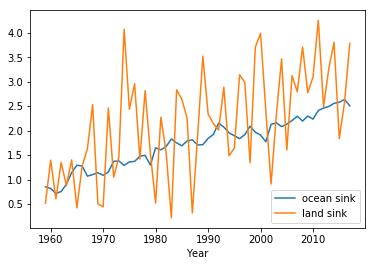

In [3]:
df.plot()

In [4]:
ocean = -df["ocean sink"]
land = -df["land sink"]

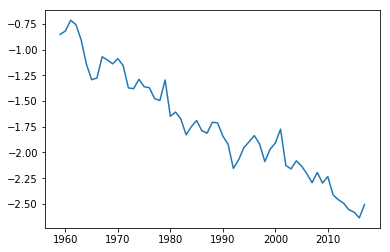

In [5]:
plt.plot(ocean)

In [37]:
def lin_reg(time_list, data, **kwargs):
    
    regression = {}
    for period in time_list.keys():
        x=time_list[period]
        y=data[x].values

        reg = stats.linregress(x,y)
        slope=reg[0]
        intercept=reg[1]
        
        line = slope*x+intercept
        
        regression[period] = (reg[0], reg[2])

        plt.plot(x, line, **kwargs)
    
    return regression

In [38]:
x1=ocean.index[1:12]
x2=ocean.index[11:22]
x3=ocean.index[21:32]
x4=ocean.index[31:42]
x5=ocean.index[41:52]
x6=ocean.index[48:59]
x7=ocean.index

In [39]:
time_dict={'1960-1970':x1, '1970-1980':x2, '1980-1990':x3, '1990-2000':x4,
           '2000-2010':x5, '2007-2017':x6}

Text(0, 0.5, 'C flux to the atmosphere (GtC/yr)')

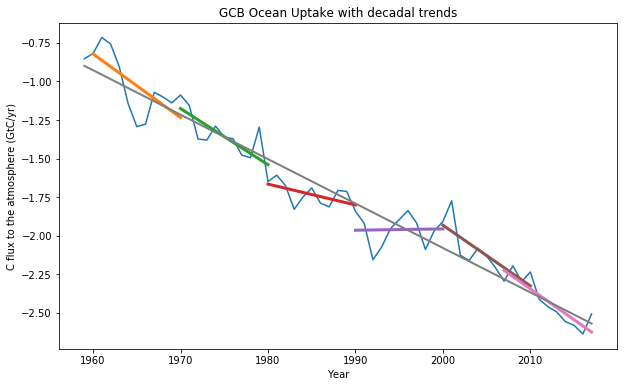

In [40]:
plt.figure(figsize=(10,6))
plt.plot(ocean)
ocean_decade = lin_reg(time_dict, ocean, linewidth=3)
ocean_whole = lin_reg({'1959-2017':x7}, ocean, linewidth=2)
plt.title('GCB Ocean Uptake with decadal trends')
plt.xlabel('Year')
plt.ylabel('C flux to the atmosphere (GtC/yr)')

In [43]:
ocean_decade, ocean_whole

({'1960-1970': (-0.041244831000909095, -0.685428971071531),
  '1970-1980': (-0.03643333040818182, -0.7784236156422163),
  '1980-1990': (-0.013505445087272722, -0.5794465163895354),
  '1990-2000': (0.000860501354545447, 0.02755904378210424),
  '2000-2010': (-0.039324524412727276, -0.8157133566033844),
  '2007-2017': (-0.04001142982727274, -0.8920865048318766)},
 {'1959-2017': (-0.02879814903541788, -0.9708966153199413)})

Text(0, 0.5, 'C flux to the atmosphere (GtC/yr)')

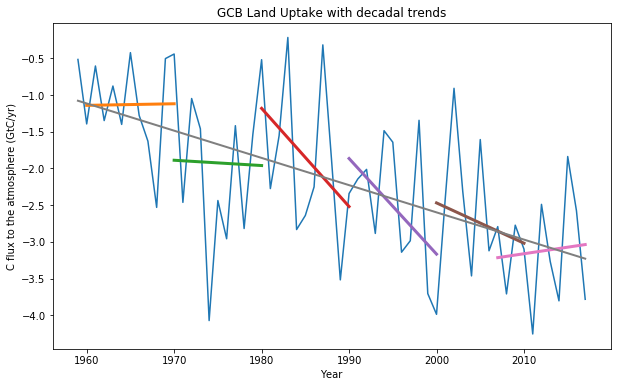

In [44]:
plt.figure(figsize=(10,6))
plt.plot(land)
land_decade = lin_reg(time_dict, land, linewidth=3)
land_whole = lin_reg({'1959-2017':x7}, land, linewidth=2)
plt.title('GCB Land Uptake with decadal trends')
plt.xlabel('Year')
plt.ylabel('C flux to the atmosphere (GtC/yr)')

In [45]:
land_decade, land_whole

({'1960-1970': (0.002169502605454543, 0.011201414958916762),
  '1970-1980': (-0.0072140079027272815, -0.021321152945218226),
  '1980-1990': (-0.13373915597545455, -0.40781539684623286),
  '1990-2000': (-0.13017918867090908, -0.4845515832532011),
  '2000-2010': (-0.05490243689000003, -0.2007967332814111),
  '2007-2017': (0.01782893230636364, 0.08260069724825218)},
 {'1959-2017': (-0.03708142333225599, -0.5873401221753709)})

Text(0, 0.5, 'C flux to the atmosphere (GtC/yr)')

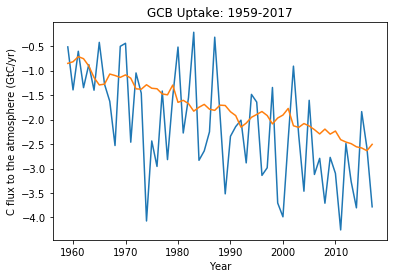

In [127]:
plt.plot(land.index, land)
plt.plot(ocean.index, ocean)
plt.title('GCB Uptake: 1959-2017')
plt.xlabel('Year')
plt.ylabel('C flux to the atmosphere (GtC/yr)')